# ENGLAND VS SLOVAKIA : PREPARING ENGLAND

## How to watch video clip in match?

## Export Physical Data from Skillcorner

In [11]:
import json
import pandas as pd 

# List of IDs for each country
country_ids = {
    'Slovenia': ['1381485', '1381466', '1381446', '1385659'],
    'England': ['726848', '1381470', '1381488', '1381509']
}

# Iterate through each country
for country, id_list in country_ids.items():
    # Iterate through each match ID
    for match_id in id_list:
        df = pd.DataFrame()  # Initialize an empty DataFrame for each match ID
        
        # Open the files
        with open(f'skillcorner/{match_id}/{match_id}_physical.json', 'r', encoding='utf-8') as f:
            data = json.load(f)
            
        # The factors we want to record. Even though some players have some more data, we select those.  
        columns_to_assign = [
            "player_id","player_name","Count High Acceleration", "Count High Acceleration 2",
            "Count High Deceleration", "Count High Deceleration 2",
            "Count HSR", "Count HSR 2",
            "Count Medium Acceleration", "Count Medium Acceleration 2",
            "Count Medium Deceleration", "Count Medium Deceleration 2",
            "Count Sprint", "Count Sprint 2",
            "count_match", "count_match_failed",
            "Distance", "Distance 2",
            "HSR Distance", "HSR Distance 2",
            "Minutes", "Minutes 1", "Minutes 2",
            "Minutes OTIP", "Minutes OTIP 1", "Minutes OTIP 2",
            "Minutes TIP", "Minutes TIP 1", "Minutes TIP 2", 
            "PSV-99", "quality_check",
            "Running Distance", "Running Distance 2",
            "Sprinting Distance", "Sprinting Distance 2"
        ]
        
        # Iterate through the list of dictionaries
        for j in range(len(data)):
            # Assign values to specific cells in the DataFrame
            for column in columns_to_assign:
                if column in data[j]:
                    df.loc[j, column] = data[j][column]
        
        # Export it to a CSV 
        df.to_csv(f"export/{country}/{match_id}.csv", index=False)


## Overview Matches

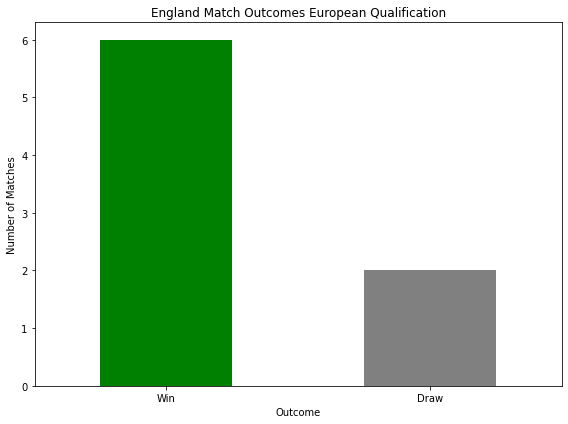

None Match not found


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Hypothetical match outcomes dataset
match_outcomes = {
    'Match ID': ['5414319', '5414298', '5414280', '5414212', '5414173', '5414149', '5414127', '5414104'],
    'Opponent': ['North Macedonia Away', 'Malta Home', 'Italy Home', 'Ukraine Away', 'North Macedonia Home', 'Malta away', 'Ukraine Home', 'Italy Away'],
    'Outcome': ['Draw', 'Win', 'Win', 'Draw', 'Win', 'Win', 'Win', 'Win']
}

# Create a DataFrame from match outcomes
df_outcomes = pd.DataFrame(match_outcomes)

# Count the number of wins, draws, and losses including all possible categories
outcome_counts = df_outcomes['Outcome'].value_counts(dropna=False)

# Plotting
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('England Match Outcomes European Qualification')
plt.xlabel('Outcome')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

def get_match_outcome(match_id):
    # Search for the match ID in the DataFrame
    match_row = df_outcomes[df_outcomes['Match ID'] == match_id]
    if not match_row.empty:
        return match_row['Outcome'].iloc[0], match_row['Opponent'].iloc[0]
    else:
        return 'Match not found', None

match_id = ''  # Change this to the match ID you want to search for
outcome, opponent = get_match_outcome(match_id)
print(f"{opponent} {outcome}")
